In [1]:
import findspark
findspark.init()

ModuleNotFoundError: No module named 'findspark'

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").getOrCreate()

In [5]:
# Creating RDDs
rdd = spark.sparkContext.parallelize([('Bob',1),('John',4),('Nancy',8),('Bob',1)])

# RDD Operations
rdd.reduceByKey(lambda a,b: a+b).collect()

[('Bob', 2), ('John', 4), ('Nancy', 8)]

In [6]:
rdd.reduce(lambda a,b:a+b)

('Bob', 1, 'John', 4, 'Nancy', 8, 'Bob', 1)

In [6]:
type(spark)

pyspark.sql.session.SparkSession

In [7]:
spark.version

'2.2.1'

In [4]:
from pyspark import SparkConf
SparkConf().getAll()

[('spark.master', 'local'),
 ('spark.submit.deployMode', 'client'),
 ('spark.app.name', 'pyspark-shell')]

In [15]:
sc=spark.sparkContext
sc.getConf().getAll()
# sc.stop()

[('spark.master', 'local'),
 ('spark.driver.host', '10.229.6.198'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.driver.port', '50367'),
 ('spark.app.id', 'local-1566878456736'),
 ('spark.app.name', 'pyspark-shell')]

In [3]:
df=spark.read.csv("test_data\\iris.csv",header=True,mode="DROPMALFORMED",inferSchema=True)

In [19]:
type(df)

pyspark.sql.dataframe.DataFrame

In [6]:
df.take(3)

[Row(_c0=1, Sepal.Length=5.1, Sepal.Width=3.5, Petal.Length=1.4, Petal.Width=0.2, Species='setosa'),
 Row(_c0=2, Sepal.Length=4.9, Sepal.Width=3.0, Petal.Length=1.4, Petal.Width=0.2, Species='setosa'),
 Row(_c0=3, Sepal.Length=4.7, Sepal.Width=3.2, Petal.Length=1.3, Petal.Width=0.2, Species='setosa')]

In [7]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Sepal.Length: double (nullable = true)
 |-- Sepal.Width: double (nullable = true)
 |-- Petal.Length: double (nullable = true)
 |-- Petal.Width: double (nullable = true)
 |-- Species: string (nullable = true)



In [8]:
df.columns

['_c0',
 'Sepal.Length',
 'Sepal.Width',
 'Petal.Length',
 'Petal.Width',
 'Species']

In [4]:
df=df.drop('_c0')

In [10]:
df.first()

Row(Sepal.Length=5.1, Sepal.Width=3.5, Petal.Length=1.4, Petal.Width=0.2, Species='setosa')

In [29]:
r=df.rdd  #convert dataframe to RDD

In [30]:
type(r)

pyspark.rdd.RDD

In [35]:
r.first()  

Row(Sepal.Length=5.1, Sepal.Width=3.5, Petal.Length=1.4, Petal.Width=0.2, Species='setosa')

In [32]:
df2=r.toDF()  #convert RDD to dataframe

In [40]:
df.show()

+------------+-----------+------------+-----------+-------+
|Sepal.Length|Sepal.Width|Petal.Length|Petal.Width|Species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
|         5.4|        3.7|         1.5|        0.2| setosa|
|         4.8|        3.4|         1.6|        0.2| setosa|
|         4.8|        3.0|         1.4|        0.1| setosa|
|         4.3|        3.0|         1.1| 

In [5]:
from pyspark.sql.functions import col
#df3=df.withColumnRenamed('Petal.Width', "Petal_Width")
df=df.toDF(*[i.replace(".","") for i in df.columns])

In [12]:
df.show()

+-----------+----------+-----------+----------+-------+
|SepalLength|SepalWidth|PetalLength|PetalWidth|Species|
+-----------+----------+-----------+----------+-------+
|        5.1|       3.5|        1.4|       0.2| setosa|
|        4.9|       3.0|        1.4|       0.2| setosa|
|        4.7|       3.2|        1.3|       0.2| setosa|
|        4.6|       3.1|        1.5|       0.2| setosa|
|        5.0|       3.6|        1.4|       0.2| setosa|
|        5.4|       3.9|        1.7|       0.4| setosa|
|        4.6|       3.4|        1.4|       0.3| setosa|
|        5.0|       3.4|        1.5|       0.2| setosa|
|        4.4|       2.9|        1.4|       0.2| setosa|
|        4.9|       3.1|        1.5|       0.1| setosa|
|        5.4|       3.7|        1.5|       0.2| setosa|
|        4.8|       3.4|        1.6|       0.2| setosa|
|        4.8|       3.0|        1.4|       0.1| setosa|
|        4.3|       3.0|        1.1|       0.1| setosa|
|        5.8|       4.0|        1.2|       0.2| 

In [6]:
from pyspark.sql.window import Window
import pyspark.sql.functions as F

In [7]:
w = Window.partitionBy(df['Species']).orderBy(df['SepalWidth'].desc())
df_cumsum = df.withColumn('cum_sum', F.sum(df['SepalWidth']).over(w))
df_cumsum.show() # simple sort column

+-----------+----------+-----------+----------+---------+------------------+
|SepalLength|SepalWidth|PetalLength|PetalWidth|  Species|           cum_sum|
+-----------+----------+-----------+----------+---------+------------------+
|        7.7|       3.8|        6.7|       2.2|virginica|               7.6|
|        7.9|       3.8|        6.4|       2.0|virginica|               7.6|
|        7.2|       3.6|        6.1|       2.5|virginica|              11.2|
|        6.3|       3.4|        5.6|       2.4|virginica|              18.0|
|        6.2|       3.4|        5.4|       2.3|virginica|              18.0|
|        6.3|       3.3|        6.0|       2.5|virginica|27.900000000000002|
|        6.7|       3.3|        5.7|       2.1|virginica|27.900000000000002|
|        6.7|       3.3|        5.7|       2.5|virginica|27.900000000000002|
|        6.5|       3.2|        5.1|       2.0|virginica| 43.90000000000001|
|        6.4|       3.2|        5.3|       2.3|virginica| 43.90000000000001|

In [66]:
df.filter(df['SepalWidth']>3.5).filter(df['PetalLength']>6.5).show()

+-----------+----------+-----------+----------+---------+
|SepalLength|SepalWidth|PetalLength|PetalWidth|  Species|
+-----------+----------+-----------+----------+---------+
|        7.7|       3.8|        6.7|       2.2|virginica|
+-----------+----------+-----------+----------+---------+



In [8]:
df=df.withColumn('test',F.when(df['SepalLength']>df['SepalWidth']*2,1).otherwise(0))

In [16]:
df.orderBy(df['SepalWidth'].desc()).show()

+-----------+----------+-----------+----------+---------+----+
|SepalLength|SepalWidth|PetalLength|PetalWidth|  Species|test|
+-----------+----------+-----------+----------+---------+----+
|        5.7|       4.4|        1.5|       0.4|   setosa|   0|
|        5.5|       4.2|        1.4|       0.2|   setosa|   0|
|        5.2|       4.1|        1.5|       0.1|   setosa|   0|
|        5.8|       4.0|        1.2|       0.2|   setosa|   0|
|        5.4|       3.9|        1.7|       0.4|   setosa|   0|
|        5.4|       3.9|        1.3|       0.4|   setosa|   0|
|        7.9|       3.8|        6.4|       2.0|virginica|   1|
|        5.1|       3.8|        1.5|       0.3|   setosa|   0|
|        7.7|       3.8|        6.7|       2.2|virginica|   1|
|        5.7|       3.8|        1.7|       0.3|   setosa|   0|
|        5.1|       3.8|        1.9|       0.4|   setosa|   0|
|        5.1|       3.8|        1.6|       0.2|   setosa|   0|
|        5.4|       3.7|        1.5|       0.2|   setos

In [9]:
window=Window.partitionBy(df['Species']).orderBy(df['SepalLength'].desc())
df=df.withColumn('lag',F.lag(df['PetalWidth']).over(window))

In [10]:
df=df.withColumn('new',F.when((F.isnull(df['lag']))| (df['test']==0), 1    ).otherwise(0))

In [11]:
df.show()

+-----------+----------+-----------+----------+---------+----+----+---+
|SepalLength|SepalWidth|PetalLength|PetalWidth|  Species|test| lag|new|
+-----------+----------+-----------+----------+---------+----+----+---+
|        7.9|       3.8|        6.4|       2.0|virginica|   1|null|  1|
|        7.7|       3.8|        6.7|       2.2|virginica|   1| 2.0|  0|
|        7.7|       2.6|        6.9|       2.3|virginica|   1| 2.2|  0|
|        7.7|       2.8|        6.7|       2.0|virginica|   1| 2.3|  0|
|        7.7|       3.0|        6.1|       2.3|virginica|   1| 2.0|  0|
|        7.6|       3.0|        6.6|       2.1|virginica|   1| 2.3|  0|
|        7.4|       2.8|        6.1|       1.9|virginica|   1| 2.1|  0|
|        7.3|       2.9|        6.3|       1.8|virginica|   1| 1.9|  0|
|        7.2|       3.6|        6.1|       2.5|virginica|   0| 1.8|  1|
|        7.2|       3.2|        6.0|       1.8|virginica|   1| 2.5|  0|
|        7.2|       3.0|        5.8|       1.6|virginica|   1| 1

In [12]:
from pyspark.sql.types import FloatType,IntegerType
from pyspark.sql.functions import udf

#udf doesn't support window function 

udf_test1=udf(lambda x:x+1.0,FloatType())
udf_test2=udf(lambda x,y:x+y, FloatType())

In [14]:
df.withColumn('udf',udf_test1('PetalWidth')).show()

+-----------+----------+-----------+----------+---------+----+----+---+---+
|SepalLength|SepalWidth|PetalLength|PetalWidth|  Species|test| lag|new|udf|
+-----------+----------+-----------+----------+---------+----+----+---+---+
|        7.9|       3.8|        6.4|       2.0|virginica|   1|null|  1|3.0|
|        7.7|       3.8|        6.7|       2.2|virginica|   1| 2.0|  0|3.2|
|        7.7|       2.6|        6.9|       2.3|virginica|   1| 2.2|  0|3.3|
|        7.7|       2.8|        6.7|       2.0|virginica|   1| 2.3|  0|3.0|
|        7.7|       3.0|        6.1|       2.3|virginica|   1| 2.0|  0|3.3|
|        7.6|       3.0|        6.6|       2.1|virginica|   1| 2.3|  0|3.1|
|        7.4|       2.8|        6.1|       1.9|virginica|   1| 2.1|  0|2.9|
|        7.3|       2.9|        6.3|       1.8|virginica|   1| 1.9|  0|2.8|
|        7.2|       3.6|        6.1|       2.5|virginica|   0| 1.8|  1|3.5|
|        7.2|       3.2|        6.0|       1.8|virginica|   1| 2.5|  0|2.8|
|        7.2

In [48]:
df.withColumn('udf_2',udf_test2('SepalLength','SepalWidth')).show()

+-----------+----------+-----------+----------+---------+----+----+---+-----+
|SepalLength|SepalWidth|PetalLength|PetalWidth|  Species|test| lag|new|udf_2|
+-----------+----------+-----------+----------+---------+----+----+---+-----+
|        7.9|       3.8|        6.4|       2.0|virginica|   1|null|  1| 11.7|
|        7.7|       3.8|        6.7|       2.2|virginica|   1| 2.0|  0| 11.5|
|        7.7|       2.6|        6.9|       2.3|virginica|   1| 2.2|  0| 10.3|
|        7.7|       2.8|        6.7|       2.0|virginica|   1| 2.3|  0| 10.5|
|        7.7|       3.0|        6.1|       2.3|virginica|   1| 2.0|  0| 10.7|
|        7.6|       3.0|        6.6|       2.1|virginica|   1| 2.3|  0| 10.6|
|        7.4|       2.8|        6.1|       1.9|virginica|   1| 2.1|  0| 10.2|
|        7.3|       2.9|        6.3|       1.8|virginica|   1| 1.9|  0| 10.2|
|        7.2|       3.6|        6.1|       2.5|virginica|   0| 1.8|  1| 10.8|
|        7.2|       3.2|        6.0|       1.8|virginica|   1| 2

In [19]:
df.groupBy('Species').agg({'SepalWidth':'sum'}).select('Species',F.col("sum(SepalWidth)").alias("sum")).show()

+----------+------------------+
|   Species|               sum|
+----------+------------------+
| virginica|             148.7|
|versicolor|138.50000000000003|
|    setosa|171.40000000000003|
+----------+------------------+



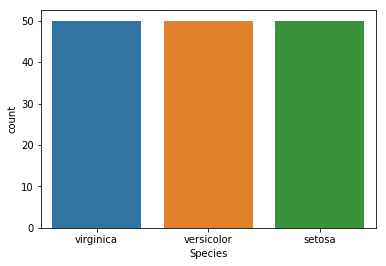

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

x=df.groupBy('Species').count().toPandas()
sns.barplot(x='Species',y='count',data=x)

In [56]:
from pyspark.sql.functions import countDistinct, avg, stddev
df.select(avg('SepalWidth').alias('avg')).show()

+-----------------+
|              avg|
+-----------------+
|3.057333333333334|
+-----------------+

